# DSAN 5700 - Homework 01 - Designing Blockchain
## Group 05 members:
- Huiting Song
- Yilin Yang
- Kangheng Liu

## 1. Blockchain Data Structure (15 points)

Each blockchain starts with a genesis block. We will need to define this block function in object-oriented python. Here are the main Block components we will need:

- Index - The index of the block on the chain (zero-indexed).
- Timestamp – Time (T) when the block was added to the chain.
- data - The data the block contains (Usually points to the root of a Merkel tree, but we can use a common thread for this).
- previous_hash - The hash value of the previous block.
- hash - Hash of this block computed using the hash_block function.
- nonce - The variable value that we change to alter the hash output (Default value = 0, irrelevant in this section).

We will need to define two functions in class Object named Block, and the two functions are __init__() (called dunder init) and blockHash(). The init function takes six inputs, including a self, from the list above (#5 above is the output). The blockHash function takes inputs from init in a string form, appends them, and encodes them through a SHA256 function.

Import following libraries before developing the function `hashlib`, `random`, `datetime`, `date`, `time`, `ipyparallel`, `numpy`, `matplotlib`. Once done Copy the following code in new cell and run it. If you get valid block prompt your block code is correct.

In [4]:
import hashlib
import random
import datetime
import ipyparallel
import numpy
import matplotlib

class Block:
    def __init__(self, index, timestamp, data, previous_hash, nonce=0):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.nonce = nonce
        self.hash = self.blockHash()

    def blockHash(self):
        block_string = str(self.index) + str(self.timestamp) + self.data + self.previous_hash + str(self.nonce)
        block_encoded = block_string.encode()
        return hashlib.sha256(block_encoded).hexdigest()


In [5]:
def block_validation(index, block_time, data, previous_hash):
    new_block = Block(index, block_time, data, previous_hash)
    check_string = '260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5'
    print_statement = "This is a valid Block" if str(new_block.hash) == check_string else "Please Check your work, this is incorrect."
    print(print_statement)

block_time = '2022-02-13 23:59:00'
data = 'Blockchain For Data Science'
previous_hash = '9136cfeb0c77b41e1e86cb9940ca9bb65f7aca4e8e366a8ecf9226b735e0c323'
index = 1

block_validation(index, block_time, data, previous_hash)

This is a valid Block


## 2. Creating a chain out of single blocks
Now that we have our class Block completed, we need to build a chain out of them. Define a function that creates a genesis_block(). This will generate the first block of the chain. Then create the function new_block(), which builds a new block on top of a given block.

The `genesis_block()` function has `index = 0`, `timestamp = Now` (whenever the function is being called), `data = "Genesis Block"`, `previous_hash = "0"` and a `return`. Be careful with NOW function (it requires datetime from date package).

`New_block()` function will take inputs:

1. Last_block = an instance of class Block that is the block that we’re building our next block on top of
2. index = index of last_block + 1
3. timestamp = Now (whenever the function is being called)
4. data = “Block {index} generated” (for example block w/ index 5 would have data: “Block 5 generated”)
5. previous_hash = hash of last_block

Once the function is generated, use the following code to test the validity

In [6]:
def genesis_block():
    return Block(0, datetime.datetime.now(), "Genesis Block", "0")

def new_block(last_block):
    index = last_block.index + 1
    timestamp = datetime.datetime.now()
    data = f"Block {index} generated"
    previous_hash = last_block.hash
    return Block(index, timestamp, data, previous_hash)

def genesis_validation(genesis_block):
    block_1 = new_block(genesis_block)
    if block_1.index == 1 and block_1.data == "Block 1 generated" and block_1.previous_hash == genesis_block.hash and str(type(block_1.timestamp)) == "<class 'datetime.datetime'>":
        print("Valid Genesis block")
    else:
        print("Check the code, not a valid genesis block:(")

# Test the genesis_validation function
genesis = genesis_block()
genesis_validation(genesis)

Valid Genesis block


## 3. Generating a complete Blockchain

We now have a complete program required to create a chain. We need variables blockchain, previous_block, and num_blocks functions to generate a chain for a specified number of blocks. Use num_blocks as 10.

1. Blockchain is used to initialize with the genesis block inside, initialied as a list.
2. previous_block – points to the genesis block
3. num_blocks – the specific number of blocks to add to the chain. For the assignment, use 10.

We want to complete the implementation of the function complete_chain(). It will take the above three inputs, which correspond to the initializations that we made.

1. The function will need a for loop from 0 to numblocks. Inside the loop, we will use newblock() function from #2 to add to the block list.
2. Once the block is generated, we will append it to the blockchain array generated above.
3. We will now set the block from step 1 as previous_block.
4. Print ("the block #{} is added to the blockchain".format(addedblock.index)).
5. Print("Hash : {}\n".format(addedblock.hash)).

You will see ten blocks with their hashes.



In [7]:
def complete_chain(blockchain, previous_block, num_blocks):
    for _ in range(num_blocks):
        new_block_instance = new_block(previous_block)
        blockchain.append(new_block_instance)
        previous_block = new_block_instance
        print("The block #{} is added to the blockchain".format(new_block_instance.index))
        print("Hash : {}\n".format(new_block_instance.hash))

# Initialize blockchain and add genesis block
blockchain = [genesis_block()]
previous_block = blockchain[0]
num_blocks = 10

complete_chain(blockchain, previous_block, num_blocks)

The block #1 is added to the blockchain
Hash : f68f6bedfda83a2d63833a9dd27ec163463a2353ea1e670013401ca8390efeea

The block #2 is added to the blockchain
Hash : ba821f6f0a171b118d03a10b83d9255fa975b99a351a2a29a8b859a3966c47f3

The block #3 is added to the blockchain
Hash : e152ff9b4ab413144e1a29a3077c54db45ff19a5804dff86887ba0eaa0268511

The block #4 is added to the blockchain
Hash : b80c20d2a160093a49e7ce0533ca4cc18ef8e481efdf714cb2b476d426a0cd21

The block #5 is added to the blockchain
Hash : 34eb93a95a0dfcd0ae34cf532d56335b3bc93ba5afeabe15db2f214c15321c18

The block #6 is added to the blockchain
Hash : f335c157b070504503c18115da574dc70d112d3452b38760accb36ef32fbabb3

The block #7 is added to the blockchain
Hash : 0c5a16a806b7a5a2d833ed2b8c9d237a5f859b460b9f4ccf2c0972eb65d9c83f

The block #8 is added to the blockchain
Hash : 4fc3db7b0cfc68cef8793585a89c959e4b3b029920a573e2a3846ea541bd9684

The block #9 is added to the blockchain
Hash : 85dbf0f10564e4622e9bcdfcffe4da008800198522b9f44cb

In [9]:
import random
import time
import secrets

## 4 Nonce and Difficulty
Now let’s make the blockchain more realistic by adding the proof-of-work consensus mechanism that Bitcoin’s Blockchain uses. We need to look at two concepts for proof of work simulation, Nonce, and Difficulty.

1. The Nonce – A randomly generated value added to the blocks to vary block hashes.
2. The network specifies the difficulty. We will set this for the assignment. It defines the valid hashes (number of) out of all possible 
3. values. Greater difficulty indicates a lower number of valid hashes.

### 4.1 Define function generate_nonce()
There are multiple ways to develop generate_nonce(). Since this is a regular n digit random number, we can use any of the methods below. Although we just need one method, you might be able to explore the ones you like. Computers can not generate true random numbers, so they use pseudo-random numbers.

1. We can use randint function to generate a number between a and b. There is a limitation to this. What is that limitation?
2. nonce = secrets.token_urlsafe() generates cryptographically strong random numbers
3. and many others, explore.

In [8]:
# 4.1 Generate Nonce
def generate_nonce(nonce_length=10):
    # Using secrets.token_urlsafe() to generate cryptographically strong random numbers
    return secrets.token_urlsafe(nonce_length)

### 4.2 Define function generate_difficulty_bound()
This is a bit harder to conceptualize. Bitcoin usually look for the number of zeros in front of a hash to define the difficulty. See the note on Bitcoin Difficulty for this. The function takes only one argument generate_difficulty_bound(difficulty=1)

1. Initiate an empty string that will hold our difficulty hash
2. We now need to generate a hex string that starts with zeros of size equal to “difficulty.” So if difficulty =1, then the string will have 1 leading zero, difficulty=2 will have 2 leading zeros. Use a for loop to generate this and append it to the string in 1.
3. In the same function, define a for loop to append a hex character, F. This loop should run for the range of length (64-difficulty).
4. We also need to prepend 0x to the now completely formed string.
5. This function should return the integer value from the string with a base 16 (since this is a hex code).

In [10]:
# 4.2 Generate Difficulty Bound
def generate_difficulty_bound(difficulty=1):
    difficulty_string = '0x' + '0'*difficulty + 'F'*(64-difficulty)
    return int(difficulty_string, 16)

## 4.3 Engineer a nonce given the previous block’s hash and difficulty
The function find_next_block() tries different blocks with the same data, index etc. but different nonces that satisfy the difficulty metric specified. This function takes three arguments find_next_block(last_block, difficulty, nonce_length)

1. Create variable start_time = time.process_time().
2. Create a variable that stores generate_difficulty_bound(difficulty).
3. Create a variable that sets next_block(last_block).
4. Create a variable that stores the hashes tried and set the start value to `1 (hashtried=1). You will increment this in every loop.
5. Create a while loop that conditionally tests the hash of the new block (in hex, so int(new_block.hash, 16)) to be greater than the difficultybound variable from #2 above.
6. Create a variable nonce to store generate_nonce(nonce_length value)
7. Create a new_block variable that used Block() function from assignment 1 (sine you are using the same file as Assignment 1, it should be able to recognize the function).
8. Increment hashtried by 1 (hashtried +=1)
9. time_taken = time.process_time() – start_time will calculate the time for finding the block.
10. Return the value of time taken, hashtried, and new_block

In [11]:
# 4.3 Find Next Block
def find_next_block(last_block, difficulty, nonce_length):
    start_time = time.process_time()
    difficulty_bound = generate_difficulty_bound(difficulty)
    next_block = new_block(last_block)
    hashes_tried = 1
    
    while int(next_block.hash, 16) > difficulty_bound:
        nonce = generate_nonce(nonce_length)
        next_block = Block(next_block.index, next_block.timestamp, next_block.data, next_block.previous_hash, nonce)
        hashes_tried += 1
    
    time_taken = time.process_time() - start_time
    return time_taken, hashes_tried, next_block

## 4.4 Blockchain with proof of work
We now need to create a blockchain with proof of work simulation.

1. Create a function create_blockchain that takes variables
    1. num_blocks
    2. difficulty
    3. blockchain
    4. previous_block
    5. nonce_length
    6. broadcast=1
2. Initiate two arrays to store hash and time so we can record the details.
3. Initiate a for loop to run for number of blocks (0, numblocks)
    1. Set the timetaken, hashestried, block_to_add to take values from find_next_block function from #4.3
    2. Append block_to_add to the blockchain array
    3. Set previousblock to be newly generated block (block_to_add)
    4. Append hash tried to hasharray
    5. Append time taken to time time
4. Time to broadcast this to the network (broadcast=1, default value) is a binary input that prints:
    1. Block number added to the chain
    2. Number of hashes tried before solving the puzzle
    3. Time to find the block
    4. Hash of the current block
    5. Returns the hash and, time arrays

Given the following data



In [12]:
# 4.4 Create Blockchain with Proof of Work
def create_blockchain(num_blocks, difficulty, blockchain, previous_block, nonce_length, broadcast=1):
    hash_array = []
    time_array = []
    
    for _ in range(num_blocks):
        time_taken, hashes_tried, block_to_add = find_next_block(previous_block, difficulty, nonce_length)
        blockchain.append(block_to_add)
        previous_block = block_to_add
        hash_array.append(hashes_tried)
        time_array.append(time_taken)
        
        if broadcast:
            print("Block #{} added to the chain".format(block_to_add.index))
            print("Number of hashes tried before solving the puzzle: {}".format(hashes_tried))
            print("Time to find the block: {} seconds".format(time_taken))
            print("Hash of the current block: {}\n".format(block_to_add.hash))
    
    return hash_array, time_array

# Test the implementation
blockchain = [genesis_block()]
previous_block = blockchain[0]
num_blocks = 20
difficulty = 3
nonce_length = 10

hash_array, time_array = create_blockchain(num_blocks, difficulty, blockchain, previous_block, nonce_length)

def blockchain_proof(blockchain, num_blocks):
    correct = True
    bound = generate_difficulty_bound(difficulty)
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain) - 1):
        if blockchain[i + 1].previous_hash != blockchain[i].hash:
            correct = False
            break
        if int(blockchain[i + 1].hash, 16) > bound:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)
            
blockchain_proof(blockchain, num_blocks)

Block #1 added to the chain
Number of hashes tried before solving the puzzle: 30
Time to find the block: 0.0014099999999999113 seconds
Hash of the current block: 00043bae4dd0c5d892ab64bfc764f228d20f1c8a2beb7cc8563a6973f257aaca

Block #2 added to the chain
Number of hashes tried before solving the puzzle: 4054
Time to find the block: 0.02768700000000024 seconds
Hash of the current block: 000b0baa65d2ff5c24502021e9fdd123cf7c1aa18ae253cba5bc8f54a510b68b

Block #3 added to the chain
Number of hashes tried before solving the puzzle: 770
Time to find the block: 0.004519000000000162 seconds
Hash of the current block: 000aace432568eb1e54f1d40d5f959da64cd5b7a477b42df3fe0f5691dc0c4b0

Block #4 added to the chain
Number of hashes tried before solving the puzzle: 7375
Time to find the block: 0.039956999999999354 seconds
Hash of the current block: 000de43ae2f8f0e04bd477a8921df8d74c1e38a105024aead2d895dda28a1672

Block #5 added to the chain
Number of hashes tried before solving the puzzle: 123
Time 

Testing: Use the following

## 5. Distributed Network

Using the following function, we will generate multiple miners. Please look at the code and explain what the entire class is doing (around two paragraphs)




In [13]:
# Naive miner class that races with other miners to see who can get a certain number of blocks first 

class MinerNodeNaive: 
    def __init__(self, name, compute):
        self.name = name 
        self.compute = compute
    
    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))

Answer:


The provided code introduces the MinerNodeNaive class, which serves as a representation of a rudimentary miner node operating within a decentralized network. The primary purpose of this class is to emulate miners engaged in a competitive race to append new blocks to a blockchain while striving to be the first to reach a specified block count. The init functions takes three inputs (self,name,compute). The name is the unique identifier of miner, and the computer may be their computational power. 

The core part of the class is the function try_hash, which takes two parameters diff_value and chain. Try_hash function begins by obtaining the latest block from the blockchain and calculating the mining difficulty level. The function then creates a new block with an incremented index, a timestamp reflecting the current moment, and a simple data message. The hash of the last block is used as a starting point for the new block's hash calculation. The critical step is the conditional check where the miner's computed hash is compared to the difficulty level, aiming to find a hash that is numerically smaller in hexadecimal format. If successful, the miner appends the new block to the blockchain, and a notification is issued, announcing the addition of the block and identifying the miner responsible. This function captures the fundamental process of blockchain mining, where miners compete to solve cryptographic puzzles and add verified blocks to the chain..



## 5. Distributed Network

### 5.1 Generate multiple mining peers
Generate five mining peers with different compute power. Use a for loop to generate an array of 5 miners; miners = [mine1, mine2, mine3, mine4, mine5]

1. Use comp_pow = random.randint to generate random numbers and assign them to five peers.
2. For each miner in miners and each number in comp_pow assign MinerNodeNaive() function

In [14]:
# Naive miner class that races with other miners to see who can get a certain number of blocks first 

class MinerNodeNaive: 
    def __init__(self, name, compute):
        self.name = name 
        self.compute = compute
    
    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = datetime.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))

In [15]:
miners = []
comp_pow = [random.randint(1, 10) for _ in range(5)]
for i, compute in enumerate(comp_pow):
    miner = MinerNodeNaive(f'mine{i+1}', compute)
    miners.append(miner)


### 5.2 Create a compute and mining simulation
This function will create a random mining pool. Define compute_simulation(miners)

1. Create an empty array com_array.
2. Using a miner in miners and that miner’s compute power, replicate miner and append it to com_array, generating the random peer group.
3. Return this compute array.

In [16]:
def compute_simulation(miners):
    comp_array = []
    for miner in miners:
        comp_array.extend([miner] * miner.compute)
    return comp_array

### 5.3 Difficulty list
Generate an array, difficult_list, of random numbers between 2 to 6 spanning the length of the chain (number of blocks).

In [17]:
difficulty_list = [random.randint(2, 6) for _ in range(len(blockchain))]

### 5.4 Simulation
Using the parameters below generate a blockchain

1. For the length of the chain (range(len(numblocks))) and while blockchain is smaller than numblocks+2.
2. Set next_miner = miner 2.
3. Sample from miners to pick one miner.
4. For miner in miners check if the sampled miner is same as miner name, if yes then set that miner as next_miner.
5. Calculate hash using next miner’s hash function (given above).

In [18]:
num_blocks = 10
blockchain = [genesis_block()]
genesis = blockchain[0]

while len(blockchain) < num_blocks + 2:
    next_miner = miners[1]  # setting default miner as miner 2
    sampled_miner = random.choice(compute_simulation(miners))
    for miner in miners:
        if sampled_miner.name == miner.name:
            next_miner = miner
    next_miner.try_hash(random.choice(difficulty_list), blockchain)


Block #1 has been added to the blockchain!
Block found by: mine1
Hash: 00ad59b6505ff573305ff26534760ec8d090d5681e01dda1d75af40aaba99d91

Block #2 has been added to the blockchain!
Block found by: mine3
Hash: 00c9a2f919501dd0d3ec6126dde46895896a1c3667880a16efb8a19b91872168

Block #3 has been added to the blockchain!
Block found by: mine5
Hash: 005cc702a36805faf856b2ee4b48dc27a38b77574c07650ddc45c26ddfdd6425

Block #4 has been added to the blockchain!
Block found by: mine4
Hash: 00d5294f35e8128452311ca028609aa3fb9538ac2e6a03b1f53640a70a213f4e

Block #5 has been added to the blockchain!
Block found by: mine4
Hash: 0005c85aa38865cc9605df21710fbba8d1a7ba1f9e186e568ed51249885e2ec4

Block #6 has been added to the blockchain!
Block found by: mine4
Hash: 00f12e5e30b236b39e0b902f236ccac8277da5db20cd5d5510b69b4a21912cd7

Block #7 has been added to the blockchain!
Block found by: mine2
Hash: 00d6b6710bb8fa31ebb96c57ef9e6a0c6862e697133e6b728506752206434768

Block #8 has been added to the blockchain

## 6. Analytics on the Blockchain Data
For each difficulty level below, use the given data and create_blockchain() function from #4.3

1. Extract hash array and time array
2. Plot all 5 hash arrays on one plot
3. Plot all 5 time arrays on one plot
4. Plot average of hash array
5. Plot average of time plot

Please make sure to have an appropriate plot title, x label, y, label, and legends to each plot.

In [19]:
blockchain = [genesis_block()]
previous_block = blockchain[0]
num_blocks = 40
nonce_len = 20
difficulty = [1,2,3,4,5]

In [20]:
hash_arrays = []
time_arrays = []

# Run create_blockchain for each difficulty level
for diff in difficulty:
    hash_array, time_array = create_blockchain(num_blocks, diff, blockchain, previous_block, nonce_len)
    hash_arrays.append(hash_array)
    time_arrays.append(time_array)

Block #1 added to the chain
Number of hashes tried before solving the puzzle: 10
Time to find the block: 0.00014600000000086766 seconds
Hash of the current block: 0b37f6d8ee777ebe779a18e49994eaf719e7e90b8da6d634e6ff45cd9cb1c56f

Block #2 added to the chain
Number of hashes tried before solving the puzzle: 28
Time to find the block: 0.0004229999999996181 seconds
Hash of the current block: 06ef00f6bf1afaf3959734a6f10e0bb111674e6bd5bed8088a061cd8f52089d9

Block #3 added to the chain
Number of hashes tried before solving the puzzle: 6
Time to find the block: 8.999999999836916e-05 seconds
Hash of the current block: 0cc894419c0b855fb01a4fe661b2a2a5f3de080333c229f066bde0a3725e472b

Block #4 added to the chain
Number of hashes tried before solving the puzzle: 1
Time to find the block: 1.1999999999900979e-05 seconds
Hash of the current block: 0cf62ff0f844d7cebf8d369c65704d4007ba093925a9662b678c4da5638559b7

Block #5 added to the chain
Number of hashes tried before solving the puzzle: 18
Time to

In [21]:
import matplotlib.pyplot as plt

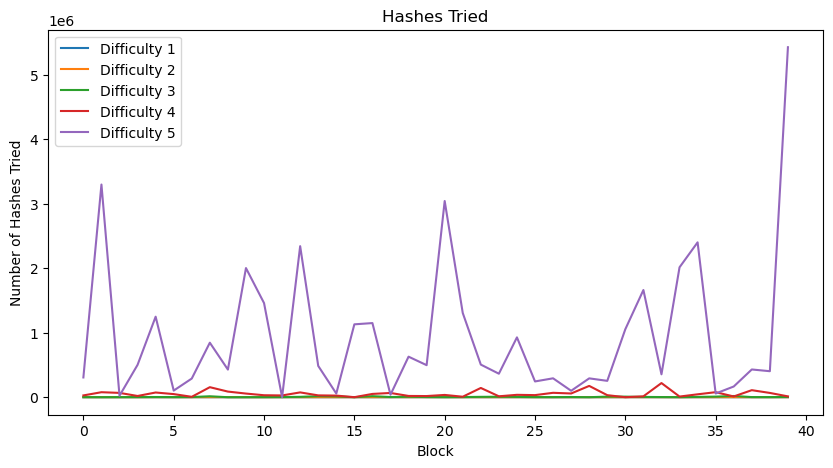

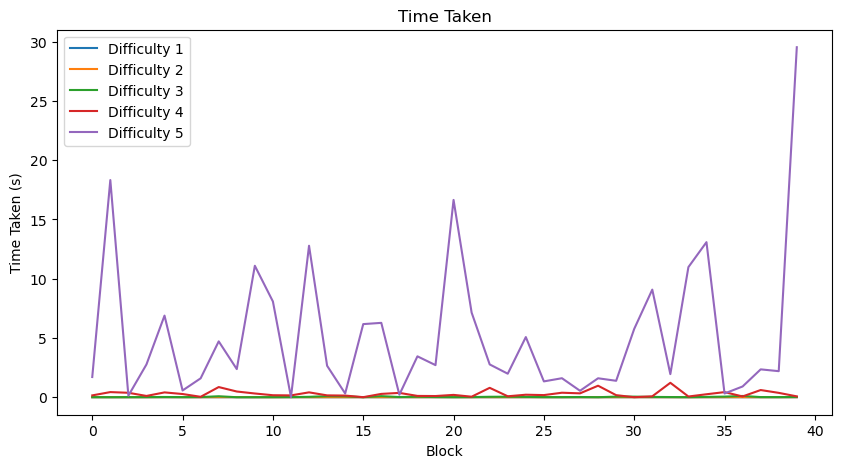

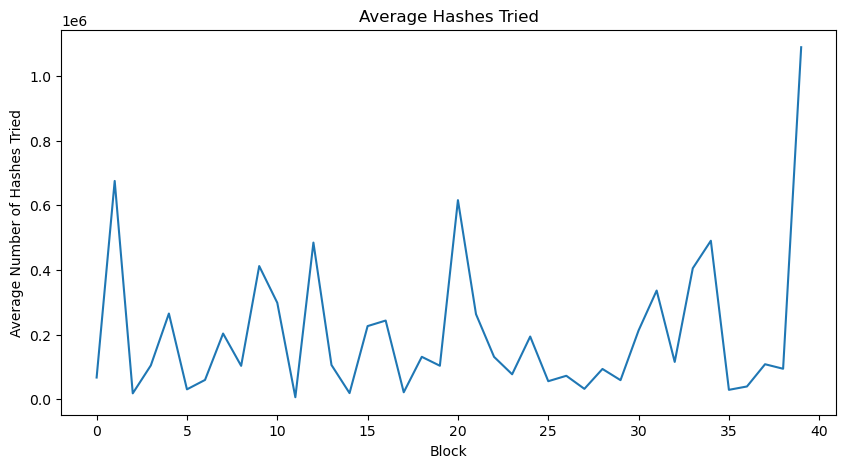

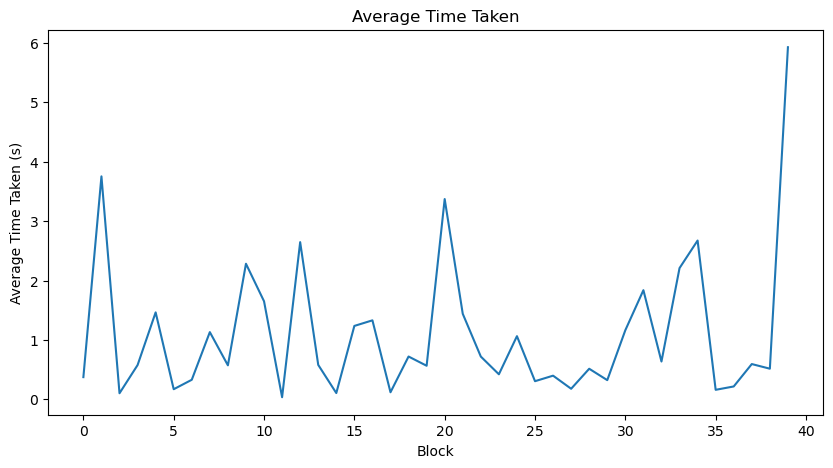

In [22]:
# Plot hash arrays
plt.figure(figsize=(10, 5))
for i, hash_array in enumerate(hash_arrays):
    plt.plot(hash_array, label=f'Difficulty {difficulty[i]}')
plt.title('Hashes Tried')
plt.xlabel('Block')
plt.ylabel('Number of Hashes Tried')
plt.legend()
plt.show()

# Plot time arrays
plt.figure(figsize=(10, 5))
for i, time_array in enumerate(time_arrays):
    plt.plot(time_array, label=f'Difficulty {difficulty[i]}')
plt.title('Time Taken')
plt.xlabel('Block')
plt.ylabel('Time Taken (s)')
plt.legend()
plt.show()

# Plot average of hash array
plt.figure(figsize=(10, 5))
avg_hash_array = [sum(x)/len(x) for x in zip(*hash_arrays)]
plt.plot(avg_hash_array)
plt.title('Average Hashes Tried')
plt.xlabel('Block')
plt.ylabel('Average Number of Hashes Tried')
plt.show()

# Plot average of time array
plt.figure(figsize=(10, 5))
avg_time_array = [sum(x)/len(x) for x in zip(*time_arrays)]
plt.plot(avg_time_array)
plt.title('Average Time Taken')
plt.xlabel('Block')
plt.ylabel('Average Time Taken (s)')
plt.show()